<a href="https://colab.research.google.com/github/Aayushee07/AdsLabs/blob/practicals/p_ads_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.datasets import load_iris

# df = pd.read_csv('/content/data.csv', encoding='unicode_escape')

iris_data = load_iris()

# Create a DataFrame
df = pd.DataFrame(data=iris_data.data, columns=iris_data.feature_names)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
df.shape

(150, 4)

In [ ]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [ ]:
df.duplicated('sepal length (cm)').sum()

115

In [ ]:
df.duplicated('StockCode').sum()

172021

In [ ]:
df.duplicated().sum()

1

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal length (cm),150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal width (cm),150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal length (cm),150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal width (cm),150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5


In [ ]:
numerical_features = ['sepal length (cm)','sepal width (cm)']

mean_values = df[numerical_features].mean()
median_values = df[numerical_features].median()
mode_values = df[numerical_features].mode().iloc[0]

print(mean_values)
print(median_values)

sepal length (cm)    5.843333
sepal width (cm)     3.057333
dtype: float64
sepal length (cm)    5.8
sepal width (cm)     3.0
dtype: float64


In [ ]:
# mean_n_values = df['sepal width (cm)'].mean()
# median_n_values = df['sepal width (cm)'].median()
# mode_n_values = df['sepal width (cm)'].mode().iloc[0]

import numpy as np
# Calculate mean, median, and mode
mean = np.mean(df["sepal width (cm)"])
median = np.median(df["sepal width (cm)"])
mode = df["sepal width (cm)"].mode().values[0]  # Extract mode from pandas Series

print(mean)
print(median)
print(mode)


3.0573333333333337
3.0
3.0


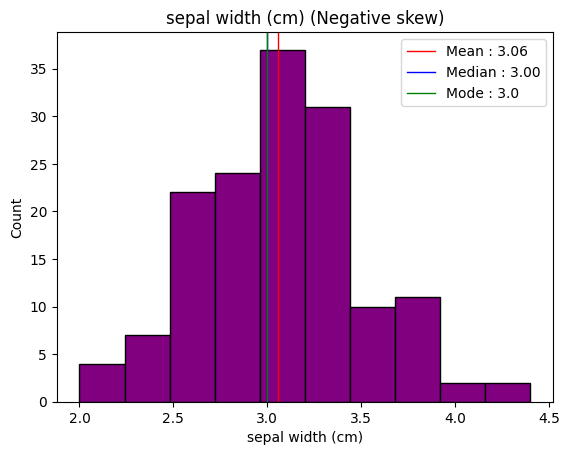

In [ ]:
import matplotlib.pyplot as plt

plt.hist(df["sepal width (cm)"],edgecolor='black',color='purple')
plt.axvline(mean,color='red',lw=1, label=f'Mean : {mean:,.2f}')
plt.axvline(median,color='blue',lw=1, label=f'Median : {median:,.2f}')
plt.axvline(mode,color='g',lw=1, label=f'Mode : {mode}')
plt.xlabel('sepal width (cm)')
plt.ylabel('Count')
plt.title('sepal width (cm) (Negative skew)')
plt.legend()

In [ ]:
from scipy.stats import skew

# Calculate skewness using scipy.stats.skew
skewness = skew(df)

print("Skewness:", skewness)

Skewness: [ 0.31175306  0.31576711 -0.27212767 -0.10193421]


In [ ]:
df.kurtosis()

sepal length (cm)   -0.552064
sepal width (cm)     0.228249
petal length (cm)   -1.402103
petal width (cm)    -1.340604
dtype: float64

<ipython-input-67-fc4e3bf6c3aa>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=kurtosis_values.index, y=kurtosis_values.values, palette='viridis')


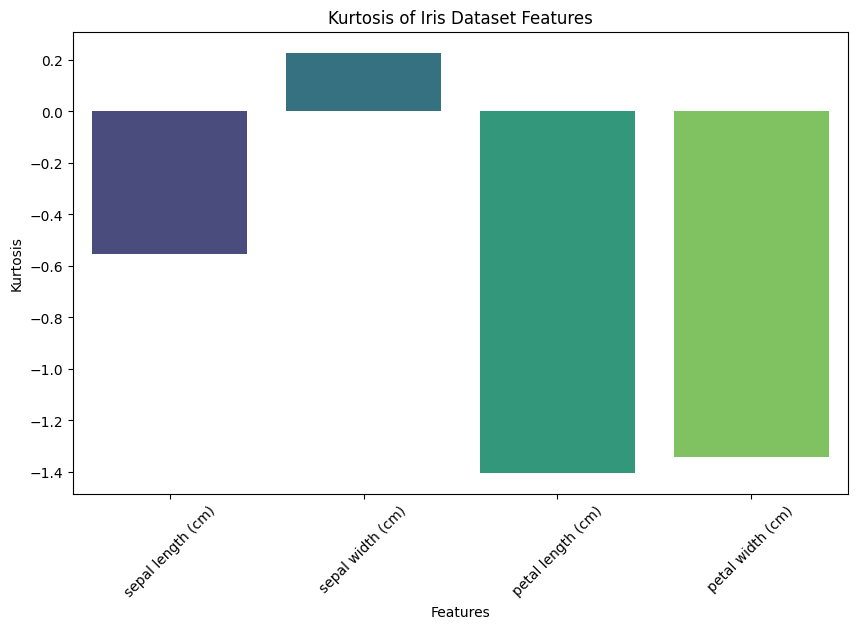

In [ ]:
import seaborn as sns

kurtosis_values = df.kurtosis()

# Plot kurtosis values
plt.figure(figsize=(10, 6))
sns.barplot(x=kurtosis_values.index, y=kurtosis_values.values, palette='viridis')
plt.xlabel('Features')
plt.ylabel('Kurtosis')
plt.title('Kurtosis of Iris Dataset Features')
plt.xticks(rotation=45)
plt.show()

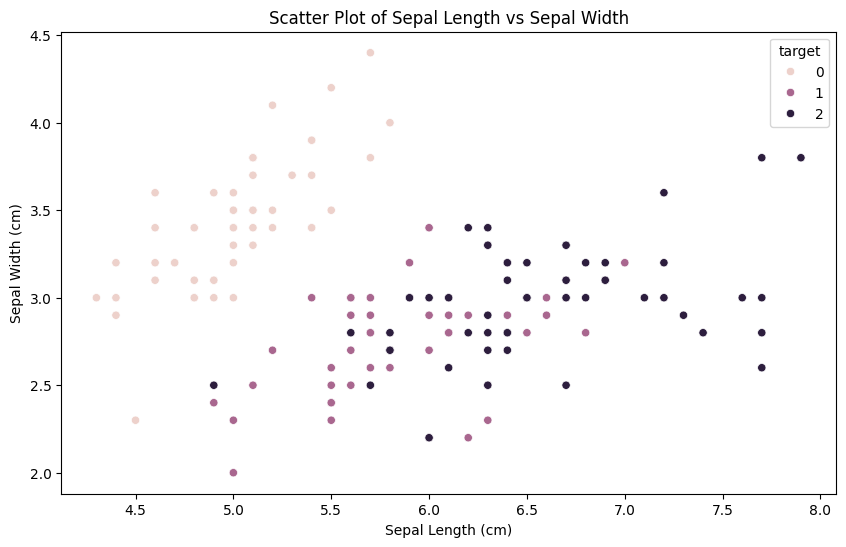

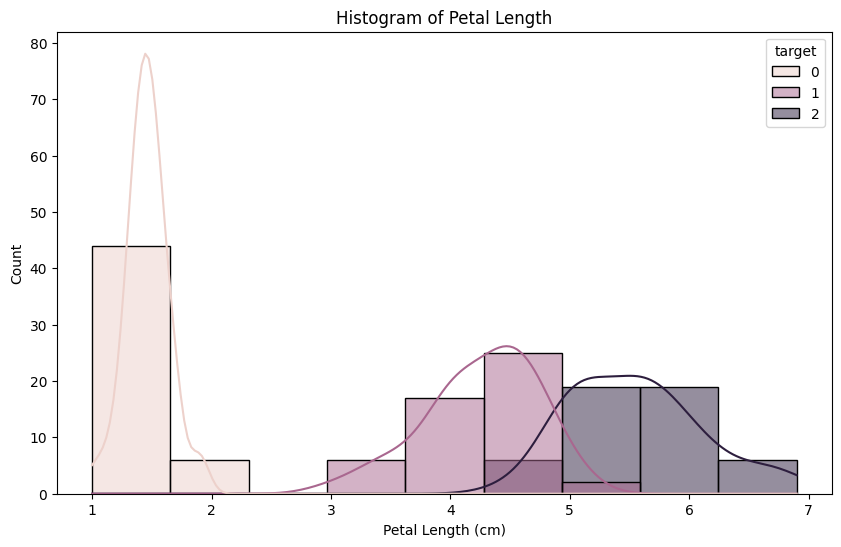

In [ ]:
df['target'] = iris_data.target

# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='sepal length (cm)', y='sepal width (cm)', hue='target', data=df)
plt.title('Scatter Plot of Sepal Length vs Sepal Width')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.show()

# Histogram
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='petal length (cm)', hue='target', kde=True)
plt.title('Histogram of Petal Length')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Count')
plt.show()

In [ ]:
# Create histograms for Quantity and UnitPrice
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.hist(df['Quantity'], edgecolor='black', color='blue', bins=30)
plt.xlabel('Quantity')
plt.ylabel('Count')
plt.title('Distribution of Quantity')

plt.subplot(2, 1, 2)
plt.hist(df['UnitPrice'], edgecolor='black', color='green', bins=30)
plt.xlabel('Unit Price')
plt.ylabel('Count')
plt.title('Distribution of Unit Price')

plt.tight_layout()
plt.show()